In [6]:
import sys
import os 
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import re

plt.style.use('seaborn-v0_8-bright')

# from allensdk.brain_observatory.ecephys.ecephys_project_cache import EcephysProjectCache

#If your computer is going low on RAM, commment the line above and use this instead:
sys.path.append('../')
from minisdk.core import EcephysProjectCache

In [2]:
# data_dir = "./allendata"
#Again, we might want to use another folder if we do want to overwrite potential data we have
data_dir = "../converted"

#From here on everything works with both AllenSDK and the MiniSDK!
manifest_path = os.path.join(data_dir, "manifest.json")
cache = EcephysProjectCache.from_warehouse(manifest=manifest_path)

In [3]:
sessions = cache.get_session_table() #Returns a Pandas dataframe
sessions.head() #Sneak peek of the table

,id,published_at,specimen_id,session_type,age_in_days,sex,full_genotype,unit_count,channel_count,probe_count,ecephys_structure_acronyms
0,715093703,2019-10-03T00:00:00Z,699733581,brain_observatory_1.1,118.0,M,Sst-IRES-Cre/wt;Ai32(RCL-ChR2(H134R)_EYFP)/wt,884,2219,6,['CA1' 'VISrl' nan 'PO' 'LP' 'LGd' 'CA3' 'DG' ...
1,719161530,2019-10-03T00:00:00Z,703279284,brain_observatory_1.1,122.0,M,Sst-IRES-Cre/wt;Ai32(RCL-ChR2(H134R)_EYFP)/wt,755,2214,6,['TH' 'Eth' 'APN' 'POL' 'LP' 'DG' 'CA1' 'VISpm...
2,721123822,2019-10-03T00:00:00Z,707296982,brain_observatory_1.1,125.0,M,Pvalb-IRES-Cre/wt;Ai32(RCL-ChR2(H134R)_EYFP)/wt,444,2229,6,['MB' 'SCig' 'PPT' 'NOT' 'DG' 'CA1' 'VISam' na...
3,732592105,2019-10-03T00:00:00Z,717038288,brain_observatory_1.1,100.0,M,wt/wt,824,1847,5,['grey' 'VISpm' nan 'VISp' 'VISl' 'VISal' 'VIS...
4,737581020,2019-10-03T00:00:00Z,718643567,brain_observatory_1.1,108.0,M,wt/wt,568,2218,6,['grey' 'VISmma' nan 'VISpm' 'VISp' 'VISl' 'VI...


Number of sessions = 58

Columns: Index(['id', 'published_at', 'specimen_id', 'session_type', 'age_in_days',
       'sex', 'full_genotype', 'unit_count', 'channel_count', 'probe_count',
       'ecephys_structure_acronyms'],
      dtype='object')

Number of unique specimen: 58

Session types: 
brain_observatory_1.1      32
functional_connectivity    26
Name: session_type, dtype: int64



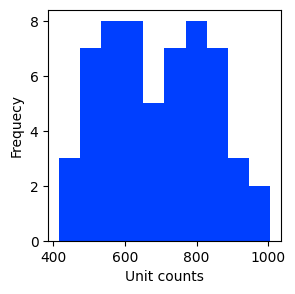

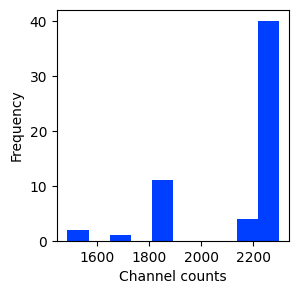

Probe count: 
6    44
5    12
4     2
Name: probe_count, dtype: int64



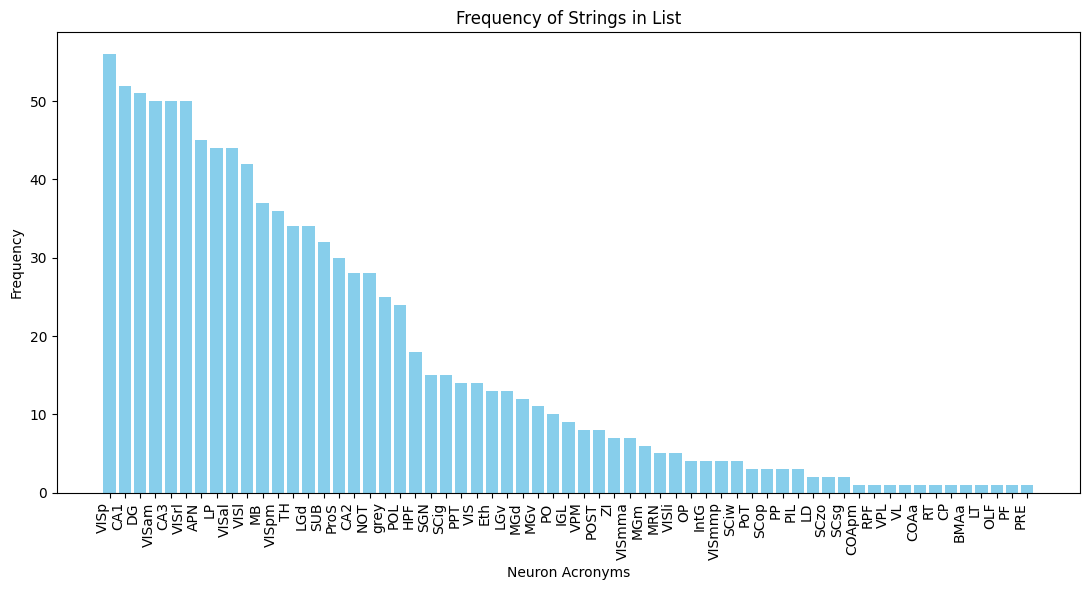

In [4]:
print(f'Number of sessions = {sessions.shape[0]}\n')

print(f'Columns: {sessions.columns}\n')

print(f'Number of unique specimen: {len(sessions.specimen_id.unique())}\n')

print(f'Session types: \n{sessions.session_type.value_counts()}\n')

# Distribution of unit counts
plt.figure(figsize=(3, 3))
plt.xlabel('Unit counts')
plt.ylabel('Frequecy')
plt.hist(sessions.unit_count)
plt.show()

# Distribution of channel counts
plt.figure(figsize=(3, 3))
plt.hist(sessions.channel_count)
plt.xlabel('Channel counts')
plt.ylabel('Frequency')
plt.show()

print(f'Probe count: \n{sessions.probe_count.value_counts()}\n')

# Structure acronyms 
pattern = r"'(.*?)'"
all_acronyms = []
for structure in sessions.ecephys_structure_acronyms:
    all_acronyms.extend(re.findall(pattern, structure))

acronym_counts = pd.DataFrame(all_acronyms).value_counts()
get_acronym_from_tuple = lambda t : t[0] 
labels = list(map(get_acronym_from_tuple, acronym_counts.index))
values = list(acronym_counts)

plt.figure(figsize=(11, 6))
plt.bar(labels, values, color='skyblue')
plt.xlabel('Neuron Acronyms')
plt.ylabel('Frequency')
plt.title('Frequency of Strings in List')
plt.xticks(rotation=90, ha='right')
plt.tight_layout()
plt.show()